In [1]:
! gdown https://drive.google.com/uc?id=1FdydikIZfRaENz3CLaZT24Deyc4KvZO3

Downloading...
From: https://drive.google.com/uc?id=1FdydikIZfRaENz3CLaZT24Deyc4KvZO3
To: /content/advertising.csv
100% 4.06k/4.06k [00:00<00:00, 11.4MB/s]


# Bai tap 1

In [73]:
import numpy as np

def get_column(data, index):
    result = data[:,index]
    return result

def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1)
    N = len(data)

    tv_data = get_column(data, 0)
    radio_data = get_column(data, 1)
    newspaper_data = get_column(data, 2)
    sales_data = get_column(data, 3)

    X = [tv_data, radio_data, newspaper_data]
    y = sales_data

    return X, y

X, y = prepare_data('advertising.csv')
list = [sum(X[0][:5]),sum(X[1][:5]),sum(X[2][:5]),sum(y[:5])]
print(list)

[624.1, 175.10000000000002, 300.5, 78.9]


# Bai tap 2

In [107]:
import random

def initialize_params():
    w1 = random.gauss(mu=0.0, sigma=0.01)
    w2 = random.gauss(mu=0.0, sigma=0.01)
    w3 = random.gauss(mu=0.0, sigma=0.01)
    b = 0

    w1 , w2 , w3 , b = (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)
    return w1, w2, w3, b

w1, w2, w3, b = initialize_params()
print(w1, w2, w3, b)

0.016992259082509283 0.0070783670518262355 -0.002307860847821344 0


In [74]:
def predict(x1, x2, x3, w1, w2, w3, b):
    result = x1*w1 + x2*w2 + x3*w3 + b
    return result

y_predict = predict(x1=1, x2=1, x3=1, w1=0, w2=0.5, w3=0, b=0.5)
print(y_predict)

1.0


In [163]:
def compute_loss_mse(y_hat, y):
    loss = (y_hat - y) ** 2
    return loss

def compute_loss_mae(y_hat, y):
    loss = abs(y_hat - y)
    return loss

y_hat = 1
y = 0.5
loss = compute_loss_mse(y, y_hat)
print(loss)

0.25


In [76]:
def compute_gradient_wi(xi, y, y_hat):
    dl_dwi = 2*(y_hat - y)*xi
    return dl_dwi

def compute_gradient_b(y, y_hat):
    dl_db = 2*(y_hat - y)
    return dl_db

g_wi = compute_gradient_wi(xi=1.0, y=1.0, y_hat=0.5)
print(g_wi)

g_b = compute_gradient_b(y=2.0, y_hat=0.5)
print(g_b)

-1.0
-3.0


In [77]:
def update_weight_wi(wi, dl_dwi, lr):
    wi = wi - lr*dl_dwi
    return wi

def update_weight_b(b, dl_db, lr):
    b = b - lr*dl_db
    return b

after_wi = update_weight_wi(wi=1.0, dl_dwi=-0.5, lr=1e-5)
print(after_wi)

after_b = update_weight_b(b=0.5, dl_db=-1.0, lr=1e-5)
print(after_b)

1.000005
0.50001


In [79]:
def implement_linear_regression(X_data, y_data, epoch_max = 50, lr = 1e-5, loss_function = 'MSE'):
    losses = []

    w1, w2, w3, b = initialize_params()

    N = len(y_data)

    for epoch in range (epoch_max):
        for i in range(N):
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]

            y = y_data[i]

            # compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # compute loss
            if loss_function == 'MSE':
                loss = compute_loss_mse(y_hat, y)
            elif loss_function == 'MAE':
                loss = compute_loss_mae(y_hat, y)


            # logging loss
            losses.append(loss)

            # compute gradient
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # update parameters
            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_b(b, dl_db, lr)

    return w1, w2, w3, b, losses

X, y = prepare_data('advertising.csv')
w1, w2, w3, b, losses = implement_linear_regression(X, y)
print(w1, w2, w3, b)

0.07405984066396477 0.15917360263437663 0.017561197559948935 0.13924260940219846


[326.9667843262905, 16.813661135067065, 53.03153479688057, 9.097721194637154, 3.6424308051668244, 7.563752860234681, 22.66109565599889, 0.2903595791172754, 14.838547485180843, 24.076309414072263, 40.37629497003938, 5.1268803606027795, 13.518222414308081, 29.260234447005313, 6.298237914505083, 9.162549922566846, 0.026579461634628335, 26.706667137444764, 31.588025437397253, 7.299166664675038, 4.87832661040257, 0.06589490698448672, 4.659432930180689, 8.197887498801554, 10.726801676543044, 46.88850553057548, 37.00183951157569, 7.945648850356329, 13.192456099944478, 12.99508446043089, 3.692858118961234, 8.94362747789156, 30.181447411539107, 11.431671284831852, 36.174366413011626, 7.460278650398524, 86.65149410437682, 5.3701391264310505, 5.3518169904114785, 46.336728755672745, 2.5374346878656464, 1.4161484943898264, 6.706004362616138, 15.295560375546378, 9.923480328914641, 0.04638468028698762, 1.7385993721560624, 1.6392488216093404, 9.405606514050849, 5.91762067788424, 0.22728553410458135, 7

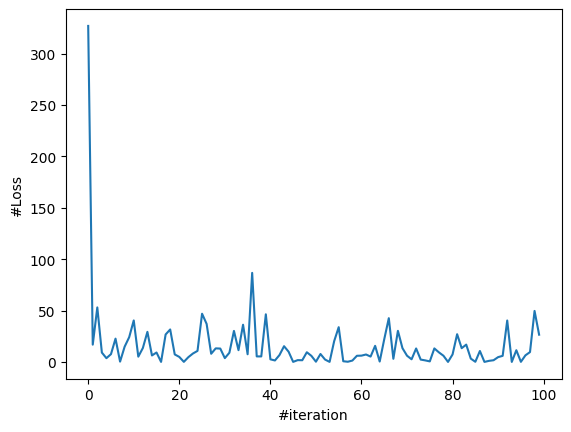

In [86]:
import matplotlib.pyplot as plt

X, y = prepare_data('advertising.csv')
w1, w2, w3, b, losses = implement_linear_regression(X, y,loss_function='MSE')
print(losses[:100])
plt.plot(losses[:100])
plt.xlabel('#iteration')
plt.ylabel('#Loss')
plt.show()


In [84]:
# given new data
tv = 19.2
radio = 35.9
newspaper = 51.3

X, y = prepare_data('advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression(X, y, epoch_max=50, lr =1e-5)
sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print (f'predicted sales is { sales }')

predicted sales is 8.176413319549823


In [162]:
l = compute_loss_mae(y_hat=1, y=0.5)
print(l)

0.5


[18.082222881224823, 4.100446455578595, 7.282275385954624, 3.016242893839479, 1.9085153405636603, 2.7502277833362605, 4.7603671765945625, 0.5388502381156339, 3.8520835252082533, 4.906761601511965, 6.354234412581848, 2.2642615486296584, 3.6767135344364377, 5.409273005405192, 2.5096290392217497, 3.026970419836779, 0.1630320877454139, 5.167849372557676, 5.620322538555706, 2.701696997199175, 2.208693417023415, 0.2567000330823639, 2.1585719654856748, 2.8631953301864606, 3.2751796403469298, 6.847518202281428, 6.082913735338986, 2.8188027334945467, 3.6321420814643908, 3.604869548323613, 1.9216810658798806, 2.99058982107068, 5.49376441172527, 3.3810754627532127, 6.0145129821966155, 2.731351066852909, 9.30867842952891, 2.3173560638000907, 2.31339944462937, 6.8071086928058335, 1.5929327317453321, 1.1900203756196053, 2.5895954051967536, 3.9109538958604944, 3.150155603920962, 0.21537102935861085, 1.318559582330682, 1.2803315280072347, 3.066856128684691, 2.4326160152979837, 0.4767447263521447, 2.77

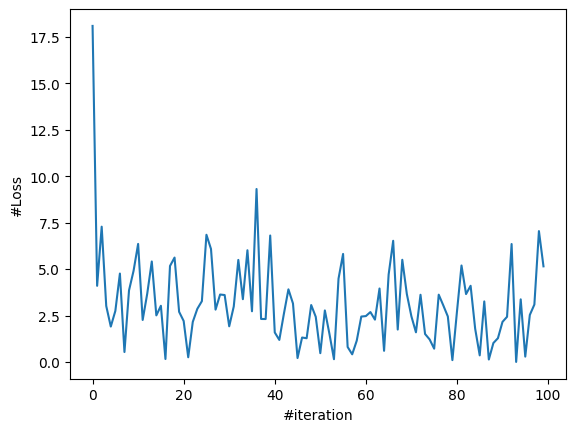

In [89]:
X, y = prepare_data('advertising.csv')
w1, w2, w3, b, losses = implement_linear_regression(X, y,loss_function='MAE')
print(losses[:100])
plt.plot(losses[:100])
plt.xlabel('#iteration')
plt.ylabel('#Loss')
plt.show()

# Bai tap 3

In [94]:
def implement_linear_regression_nsamples(X_data, y_data, epoch_max=50, lr=1e-5, loss_function = 'MSE'):
    losses = []

    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    for epoch in range (epoch_max):

        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0

        for i in range(N):
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]

            y = y_data[i]

            # compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # compute loss
            if loss_function == 'MSE':
                loss = compute_loss_mse(y_hat, y)
            elif loss_function == 'MAE':
                loss = compute_loss_mae(y_hat, y)

            # accumulate loss
            loss_total += loss

            # compute gradient
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # accumulate gradient
            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db

        # update parameters
        w1 = update_weight_wi(w1, dw1_total/N, lr)
        w2 = update_weight_wi(w2, dw2_total/N, lr)
        w3 = update_weight_wi(w3, dw3_total/N, lr)
        b = update_weight_b(b, db_total/N, lr)

        # logging loss
        losses.append(loss_total/N)

    return w1, w2, w3, b, losses

X, y = prepare_data('advertising.csv')
w1, w2, w3, b, losses = implement_linear_regression_nsamples(X, y)
print(w1, w2, w3, b)
print(losses)

0.0777391352775665 0.05644769904625777 0.04135488482198375 0.0016724035422583067
[172.98395547828923, 39.4081674745134, 18.15746728564735, 14.634633779162357, 13.913880074022757, 13.640049637323427, 13.441395294810789, 13.259118517018994, 13.083802587178743, 12.913826664416215, 12.748804182322559, 12.58854742072041, 12.432904005847659, 12.281730988201284, 12.134890631437667, 11.992249630675893, 11.853678875589457, 11.719053303032835, 11.588251767260099, 11.461156916275085, 11.33765507239911, 11.217636116651946, 11.100993376782947, 10.987623518830576, 10.877426442098113, 10.77030517743778, 10.666165788738786, 10.564917277518694, 10.466471490519933, 10.370743030217112, 10.277649168143098, 10.187109760945372, 10.099047169086274, 10.013386178104167, 9.930053922354572, 9.848979811153313, 9.770095457245782, 9.69333460752933, 9.61863307595747, 9.545928678557278, 9.475161170493593, 9.406272185115144, 9.339205174920474, 9.273905354383018, 9.210319644576826, 9.148396619546123, 9.088086454363877,

0.06710990754044266 0.15756173831487585 0.029619799386084403
[172.98395547828923, 39.4081674745134, 18.15746728564735, 14.634633779162357, 13.913880074022757, 13.640049637323427, 13.441395294810789, 13.259118517018994, 13.083802587178743, 12.913826664416215, 12.748804182322559, 12.58854742072041, 12.432904005847659, 12.281730988201284, 12.134890631437667, 11.992249630675893, 11.853678875589457, 11.719053303032835, 11.588251767260099, 11.461156916275085, 11.33765507239911, 11.217636116651946, 11.100993376782947, 10.987623518830576, 10.877426442098113, 10.77030517743778, 10.666165788738786, 10.564917277518694, 10.466471490519933, 10.370743030217112, 10.277649168143098, 10.187109760945372, 10.099047169086274, 10.013386178104167, 9.930053922354572, 9.848979811153313, 9.770095457245782, 9.69333460752933, 9.61863307595747, 9.545928678557278, 9.475161170493593, 9.406272185115144, 9.339205174920474, 9.273905354383018, 9.210319644576826, 9.148396619546123, 9.088086454363877, 9.029340874825948, 

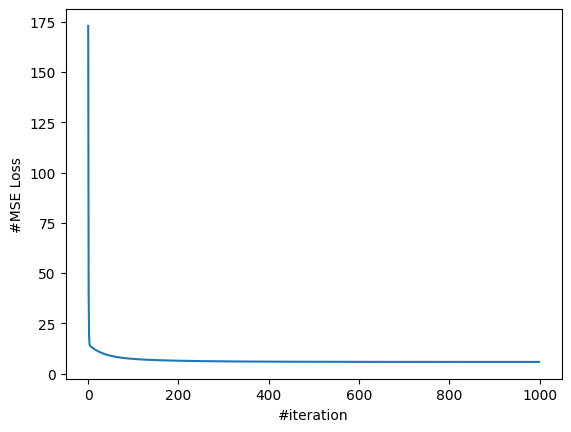

In [101]:
X, y = prepare_data('advertising.csv')
w1, w2, w3, b, losses = implement_linear_regression_nsamples(X, y,epoch_max = 1000, lr=1e-5, loss_function='MSE')
print(w1, w2, w3)
print(losses)
plt.plot(losses)
plt.xlabel('#iteration')
plt.ylabel('#MSE Loss')
plt.show()

0.06710990754044266 0.15756173831487585 0.029619799386084403
[12.537758993110772, 5.905253690937074, 3.7290201321746137, 3.280103342013847, 3.1836865214240593, 3.1504551681146706, 3.1282032310037176, 3.107834776878128, 3.0877653671823877, 3.067869077619822, 3.0482166503078565, 3.02883345816351, 3.0097268958233707, 2.990926260388694, 2.9724018229858893, 2.954147483295836, 2.936159497829541, 2.9184793882434996, 2.9013201899015386, 2.8848065446993694, 2.8692913979087806, 2.8540808729447424, 2.8391539128581824, 2.824441258695949, 2.809939593214031, 2.795661552510065, 2.781611479829696, 2.7677616004414416, 2.7541088214511316, 2.7406510256334013, 2.727970116901554, 2.7155029638904806, 2.703211839174965, 2.6910940299623816, 2.6792629854501695, 2.6676459659520204, 2.6561923391983115, 2.645064404704684, 2.6341944320960224, 2.623535606535408, 2.6130255229490116, 2.6026618964920454, 2.592442478315787, 2.5823650549969863, 2.5725241259925906, 2.562865212228721, 2.553339917055549, 2.5439461929615637

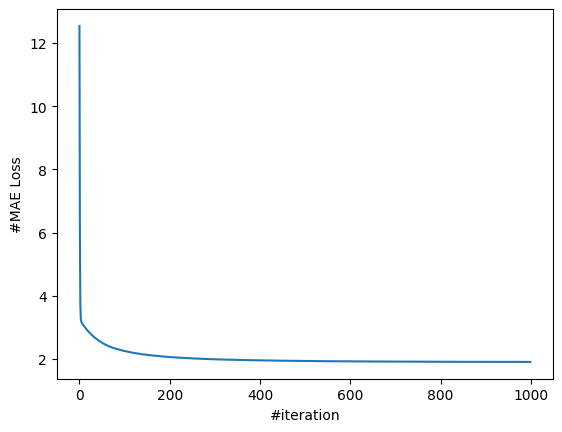

In [103]:
X, y = prepare_data('advertising.csv')
w1, w2, w3, b, losses = implement_linear_regression_nsamples(X, y,epoch_max = 1000, lr=1e-5, loss_function='MAE')
print(w1, w2, w3)
print(losses)
plt.plot(losses)
plt.xlabel('#iteration')
plt.ylabel('#MAE Loss')
plt.show()

# Bai tap 4

In [104]:
def prepare_data_4(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1)

    tv_data = get_column(data, 0)
    radio_data = get_column(data, 1)
    newspaper_data = get_column(data, 2)
    sales_data = get_column(data, 3)

    X = [[1, x1, x2, x3] for x1, x2, x3 in zip(tv_data, radio_data, newspaper_data)]
    y = sales_data

    return X, y

In [106]:
def initialize_params_4():
    bias = 0
    w1 = random.gauss(mu=0.0, sigma=0.01)
    w2 = random.gauss(mu=0.0, sigma=0.01)
    w3 = random.gauss(mu=0.0, sigma=0.01)

    return [0 , -0.01268850433497871 , 0.004752496982185252 , 0.0073796171538643845]
    #return [bias, w1, w2, w3]

In [155]:
def predict_4(X_features, weights):
    result = np.dot(X_features, weights)
    return result

weights = [2,2,2]
X_features = [1,1,1]
y_hat = predict_4(X_features, weights)
print(y_hat)

6


In [156]:
def compute_gradient_wi_4(weights, y, y_hat):
    dl_dweights = np.multiply(2*(y_hat - y),weights)
    return dl_dweights

weights = [2,2,2]
y = 3.5
y_hat = 0.5
dl_dweights = compute_gradient_wi_4(weights, y, y_hat)
print(dl_dweights)

[-12. -12. -12.]


In [147]:
def update_weight_wi_4(weights, dl_dweights, lr):
    weights = weights - np.multiply(lr,dl_dweights)
    return weights

weights = [2,2,2]
dl_dweights = [1,1,1]
lr = 1e-5
weights = update_weight_wi_4(weights, dl_dweights, lr)
print(weights)

[1.99999 1.99999 1.99999]


In [167]:
def implement_linear_regression_4(X_feature, y_ouput, epoch_max=50, lr=1e-5, loss_function = 'MSE'):
    losses = []

    weights = initialize_params_4()

    N = len(y_ouput)

    for epoch in range (epoch_max):
        for i in range(N):
            #get a sample - row i
            sample_i = X_feature[i]
            y = y_ouput[i]

            #compute output
            y_hat = predict_4(sample_i, weights)

            #compute loss
            if loss_function == 'MSE':
                loss = compute_loss_mse(y_hat, y)
            elif loss_function == 'MAE':
                loss = compute_loss_mae(y_hat, y)

            #compute gradient
            dl_dweights = compute_gradient_wi_4(sample_i, y, y_hat)

            #update parameters
            weights = update_weight_wi_4(weights, dl_dweights, lr)

            #logging loss
            losses.append(loss)

    return weights, losses

In [168]:
X, y = prepare_data_4('advertising.csv')
W, L = implement_linear_regression_4(X, y, epoch_max=50, lr=1e-5)
# Print loss value at iteration 9999
print(L[9999])

31.339223408109948


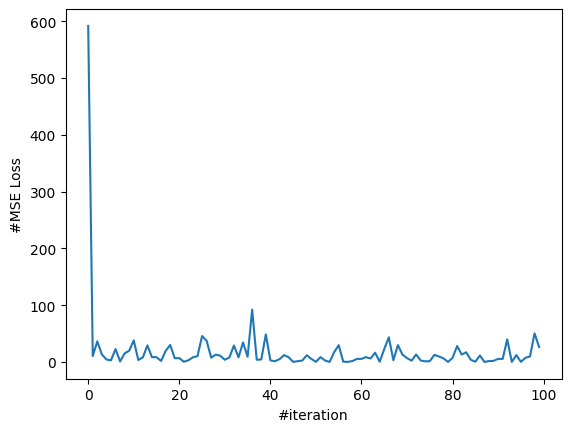

In [170]:
plt.plot(L[:100])
plt.xlabel('#iteration')
plt.ylabel('#MSE Loss')
plt.show()